## Seaborn - Intro

In [20]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 

# Load Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (Datetime & 'job_skills' to list type)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)) 

#### Install and Import Seaborn

In [23]:
import seaborn as sns

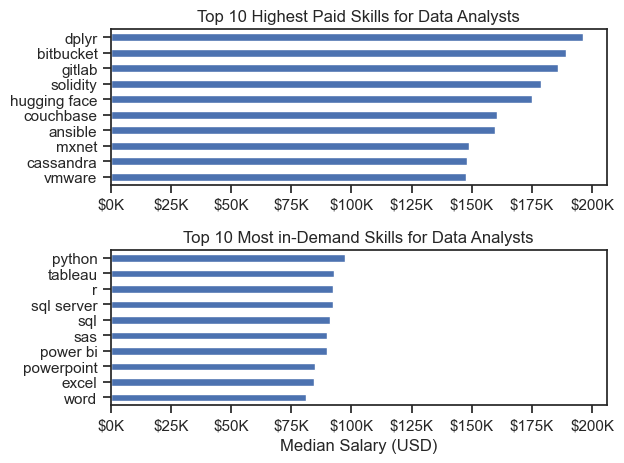

In [31]:
# From Skill Pay Analysis Bar Chart - ORIGINAL

# Filter for 'Data Analyst' jobs and jobs from the USA (also dropping NaN values)
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Explode out the job_skills column
df_DA_US = df_DA_US.explode('job_skills')

# Group by
df_DA_US_grouped = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# Top 10 highest paying skills
df_DA_US_top_pay = df_DA_US_grouped.sort_values(by='median', ascending=False).head(10)

# Skills with the highest count
df_DA_US_top_count = (df_DA_US_grouped
                      .sort_values(by='count', ascending=False).head(10) # Sort by count
                      .sort_values(by='median', ascending=False) # Sort the top 10 by median salary
                      )

fig, ax = plt.subplots(2, 1) # 2 rows, 1 column

# 1st subplot
df_DA_US_top_pay.plot(kind='barh', y = 'median', ax = ax[0], legend=False)
ax[0].invert_yaxis() # So that we get the highest salary at the top rather than the bottom
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# 2nd subplot
df_DA_US_top_count.plot(kind='barh', y = 'median', ax = ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most in-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim()) # Helps us use the x axis from the top plot in the bottom
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()

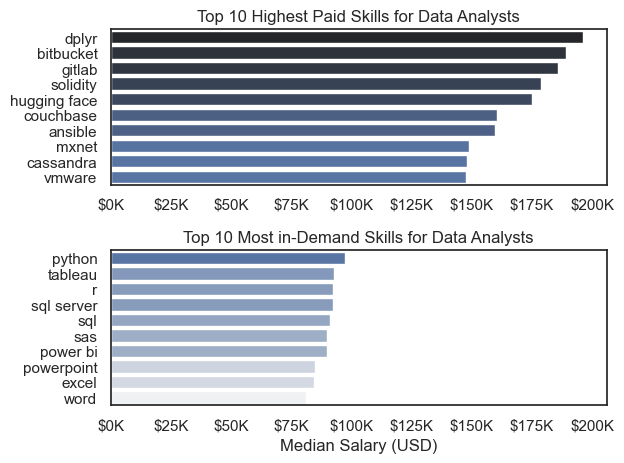

In [43]:
# NEW - Bar chart converted to Seaborn
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')

# 1ST SUBPLOT - Highest Paid Skills
sns.barplot(data=df_DA_US_top_pay, x='median', y=df_DA_US_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

# df_DA_US_top_pay.plot(kind='barh', y = 'median', ax = ax[0], legend=False)
# ax[0].invert_yaxis() # So that we get the highest salary at the top rather than the bottom
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# 2ND SUBPLOT - Most In-Demand Skills (Highest Count)
sns.barplot(data=df_DA_US_top_count, x='median', y=df_DA_US_top_count.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

# df_DA_US_top_count.plot(kind='barh', y = 'median', ax = ax[1]) # 
# ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most in-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim()) # Helps us use the x axis from the top plot in the bottom
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
fig.tight_layout()

## Histograms

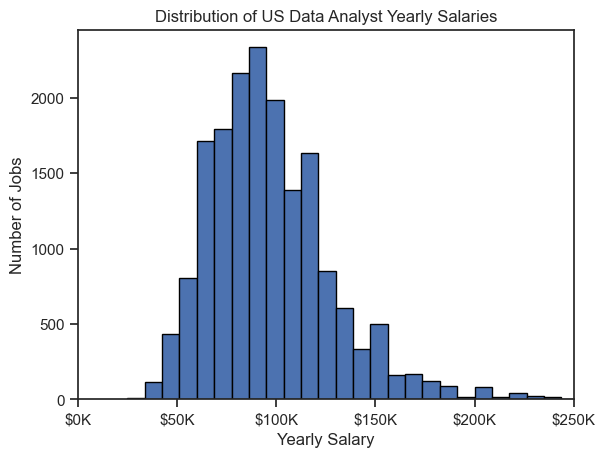

In [44]:
# ORIGINAL PLOT (Histrogram) - Lesson 17

df_DA_US['salary_year_avg'].plot(kind='hist', bins = 40, edgecolor = 'black')
plt.xlim(0,250000)

# Formatting x axis labels
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Titles
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

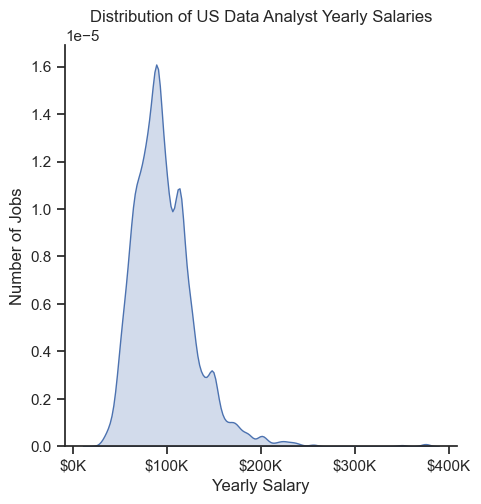

In [47]:
# NEW PLOT - Using Seaborn .distplot
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

# Formatting x axis labels
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Titles
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

In [48]:
# Code for boxplot from lesson 17

# List of job titles needed for plot
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter data for jobs in job_titles and from the USA + Drop NaN Values
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

# Using list comprehension to get a series of the salaries for each of the 3 job titles
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

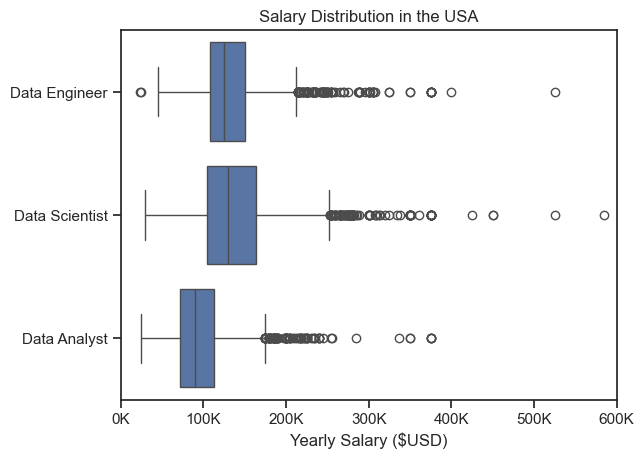

In [51]:
sns.boxplot(data=df_US, x = 'salary_year_avg', y = 'job_title_short')

plt.title('Salary Distribution in the USA')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()